# KNN implementation with all possible data 

In [111]:
# imports
from sklearn.neighbors import KNeighborsClassifier
import importlib.util
spec = importlib.util.spec_from_file_location("module.name", "../functions.py")
functions = importlib.util.module_from_spec(spec)
spec.loader.exec_module(functions)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd

## KNN with just using default values

In [112]:
# get data
X, y = functions.get_data()
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [113]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [114]:
# predict test values
y_pred_basic = knn.predict(X_test)

In [115]:
# calculate F1 score
f1_basic = f1_score(y_test, y_pred_basic)
"F1 score is = {0}".format(f1_basic)

'F1 score is = 0.19064124783362216'

In [116]:
# write result to file
f = open("../results/files/knn_results.txt", "w+")
f.write("Basic KNN: F1 score = {0} \n".format(f1_basic))
f.close()

In [117]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_basic, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/knn_prediction_basic.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,0.0,-0.400470,0.639329,0.091538,-0.747735,0.230938,-0.149150,2.033864,0.599948,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,3.840193,-0.01048,-0.055289,-0.03357,-0.03274
1,0.0,0.0,-0.402311,0.639329,0.161793,-1.206717,-1.430694,-1.091931,-0.490622,-0.814524,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
2,0.0,0.0,2.530987,0.639329,0.056410,-0.063130,-0.322939,0.033678,-1.046610,1.284370,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
3,0.0,0.0,-0.398169,0.639329,-0.681266,-0.552426,-0.599878,-0.854979,-0.160034,1.375627,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
4,0.0,1.0,-0.385431,-1.564141,-2.859167,0.221173,1.061754,0.593562,0.516167,-0.632012,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
5,0.0,0.0,-0.391377,0.639329,1.039979,0.395609,-1.707632,0.151266,-0.355382,-1.270806,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
6,0.0,0.0,-0.401110,0.639329,0.899469,-1.052728,-1.153755,-0.798297,-0.129981,-0.266987,...,-0.111088,5.538246,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
7,0.0,0.0,2.530987,0.639329,0.969724,-0.395453,1.061754,0.487938,0.185580,-0.860152,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
8,0.0,0.0,2.530987,0.639329,0.934597,-0.453828,-0.322939,-1.219301,-1.136770,-0.540755,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274
9,0.0,0.0,-0.391722,0.639329,0.372557,0.264036,-0.322939,0.859388,0.200606,1.010601,...,-0.111088,-0.180563,-0.077776,-0.056524,-0.038889,-0.260404,-0.01048,-0.055289,-0.03357,-0.03274


## KNN with removed outliers

In [144]:
# get data
X, y = functions.get_data(type="__removeoutliers")
# split dataset into train and test data
X_train, X_test, y_train, y_test_outliers = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [145]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [146]:
# predict test values
y_pred_outliers = knn.predict(X_test)

In [147]:
# calculate F1 score
# calculate F1 score
f1_outliers = f1_score(y_test_outliers, y_pred_outliers)
"F1 score is = {0}".format(f1_outliers)

'F1 score is = 0.1852090032154341'

In [148]:
# write result to file
f = open("../results/files/knn_results.txt", "a")
f.write("Basic KNN without outliers: F1 score = {0} \n".format(f1_outliers))
f.close()

In [149]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_outliers, columns=["y_pred"])

result['y_test'] = y_test_outliers["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/knn_prediction_basic_removed_outliers.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.0,0.0,-0.389823,0.621965,1.332773,0.063930,1.072465,-1.007519,0.345056,-0.150577,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
1,0.0,0.0,-0.394170,-1.607808,-0.746539,-0.761161,-1.422121,0.517600,2.674602,-0.742887,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
2,0.0,0.0,-0.396070,0.621965,0.938420,-0.964789,-0.867768,-0.228733,-0.410890,1.854164,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
3,0.0,1.0,-0.401291,0.621965,0.042165,-0.275354,1.072465,-1.331000,-0.626874,0.168359,...,-0.11134,-0.1833,12.533124,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
4,0.0,0.0,-0.396519,0.621965,0.759169,0.431173,0.518113,1.826860,-0.194905,-1.471884,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
5,0.0,0.0,2.542801,0.621965,0.938420,-0.456601,-0.313416,-1.394152,-1.105125,-0.560638,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
6,0.0,1.0,-0.382114,0.621965,-0.746539,0.446034,-1.144945,1.362161,-0.210333,0.168359,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
7,0.0,1.0,-0.390190,0.621965,0.723319,-0.725574,-1.144945,-0.272252,-0.179478,1.034043,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
8,0.0,0.0,2.542801,0.621965,0.830870,-0.080074,1.072465,-0.971596,-0.750294,0.077234,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648
9,0.0,1.0,-0.398165,0.621965,0.544068,-0.219077,1.072465,-1.455696,0.237064,0.396170,...,-0.11134,-0.1833,-0.079789,-0.058525,-0.037146,-0.263625,-0.011193,-0.051662,-0.033596,-0.032648


## KNN with PCA features

In [124]:
# get data
X, y = functions.get_data(type="__PCA")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [125]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [126]:
# predict test values
y_pred_PCA = knn.predict(X_test)

In [127]:
# calculate F1 score
f1_PCA = f1_score(y_test, y_pred_PCA)
"F1 score is = {0}".format(f1_PCA)

'F1 score is = 0.9859562164394878'

In [128]:
# write result to file
f = open("../results/files/knn_results.txt", "a")
f.write("Basic KNN with PCA features: F1 score = {0} \n".format(f1_PCA))
f.close()

In [129]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_PCA, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/knn_prediction_PCA_features.csv")

result.head(20)

,y_pred,y_test,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,-0.400477,-0.082143,-0.750388,0.278720,-0.432249,-0.211170,0.532186,-0.190293,...,-0.622211,-1.397839,3.069570,-1.175255,-0.562167,-0.576471,-0.282406,0.013486,-0.092165,-0.006351
1,0.0,0.0,-0.402323,-0.066514,-1.188490,-0.279715,0.628326,-0.085352,-0.932000,-0.328208,...,-0.302098,0.144711,-0.335292,-0.300225,-0.060916,-0.055078,-0.071163,-0.031553,-0.037532,0.008282
2,0.0,0.0,2.530986,-0.060316,-0.099028,0.038532,-0.139802,0.183107,1.270880,-1.012257,...,-0.230210,0.163670,-0.281541,-0.209122,-0.050458,-0.035853,-0.037675,-0.008828,-0.076058,-0.001128
3,0.0,0.0,-0.398175,-0.048190,-0.558404,0.344964,0.577888,0.624247,1.398563,-0.232368,...,-0.308598,-1.501943,-0.209727,-0.151522,-0.107973,-0.570673,-0.041347,0.037460,-0.087365,0.026866
4,1.0,1.0,-0.385428,-0.088445,0.207748,0.607378,-0.799099,2.797984,-0.319684,0.005439,...,-0.344556,0.016495,-0.403983,-0.130405,-0.238490,-0.054282,0.086828,0.159997,-0.095100,0.067401
5,0.0,0.0,-0.391373,0.056598,0.411264,-0.301161,0.199142,-1.017154,-1.348536,0.158118,...,-0.374843,-0.021493,0.209273,1.093277,1.989610,-0.176388,1.463254,0.275495,6.422506,-9.100952
6,0.0,0.0,-0.401121,-0.084226,-1.055604,0.279967,0.173170,-0.900550,-0.439975,-0.255181,...,-0.608154,-1.598903,-0.048021,4.421824,-2.594189,-0.521362,-0.728164,-0.127518,-0.377634,0.042089
7,0.0,0.0,2.530983,-0.084785,-0.442709,0.323214,-1.048834,-0.675325,-0.976438,0.302093,...,-0.341652,-0.124376,-2.625031,-1.362530,-0.507075,-0.103206,-0.298700,-0.029832,-0.145281,-0.046892
8,0.0,0.0,2.530981,0.016074,-0.490809,-0.040682,1.198496,-0.441617,-0.677945,0.454307,...,-0.325239,0.069723,-0.157485,-0.231124,0.003327,-0.035362,-0.085291,-0.103467,-0.068443,-0.000795
9,0.0,0.0,-0.391718,-0.048038,0.273874,-0.034850,-0.884100,-0.579877,1.006610,0.126834,...,-0.130603,0.158465,0.018432,0.006662,-0.023630,-0.030309,0.010188,0.030898,0.036822,-0.006641


## KNN with feature tools features

In [130]:
# get data
X, y = functions.get_data(type="__FTs")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [131]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
# predict test values
y_pred_FT = knn.predict(X_test)

In [133]:
# calculate F1 score
f1_FT = f1_score(y_test, y_pred_FT)
"F1 score is = {0}".format(f1_FT)

'F1 score is = 0.2109704641350211'

In [134]:
# write result to file
f = open("../results/files/knn_results.txt", "a")
f.write("Basic KNN with FT features: F1 score = {0} \n".format(f1_FT))
f.close()

In [135]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_FT, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/knn_prediction_FT_features.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Current Loan Amount + Term,Current Loan Amount / Purpose_Other,Current Loan Amount / Purpose_Medical Bills,Current Loan Amount / Purpose_Educational Expenses,Current Loan Amount / Purpose_small_business,Current Loan Amount / Purpose_renewable_energy,Current Loan Amount / Purpose_wedding,...,1 % Current Loan Amount,1 / Current Loan Amount,0 - Current Loan Amount,Current Loan Amount / Purpose_major_purchase,Credit Score + Current Loan Amount,Current Loan Amount / Purpose_moving,Current Loan Amount / Purpose_Take a Trip,Current Loan Amount / Home Ownership_HaveMortgage,Current Loan Amount / Purpose_Buy House,Current Loan Amount / Purpose_Buy a Car
0,0.0,0.0,-0.400470,0.162835,0.406640,0.403396,0.400492,0.401313,0.400517,0.400604,...,-0.434613,-0.360434,0.400470,0.400962,-0.205510,0.400612,0.401600,0.400859,0.402126,0.402644
1,0.0,0.0,-0.402311,0.161580,0.408512,0.405247,0.402335,0.403156,0.402358,0.402447,...,-0.448239,-0.349015,0.402311,0.402806,-0.160000,0.402456,0.403447,0.402703,0.403973,0.404497
2,0.0,0.0,2.530987,2.161271,-2.574281,-2.543845,-2.533190,-2.533363,-2.530965,-2.532860,...,2.529225,2.529647,-2.530987,-2.536025,1.721212,-2.533966,-2.539360,-2.534688,-2.538818,-2.547566
3,0.0,0.0,-0.398169,0.164404,0.404300,0.401083,0.398190,0.399009,0.398216,0.398302,...,-0.417584,-0.374853,0.398169,0.398656,-0.718071,0.398309,0.399292,0.398555,0.399818,0.400329
4,0.0,1.0,-0.385431,-1.329065,0.391348,0.388277,0.385443,0.386258,0.385479,0.385556,...,-0.323316,-0.457791,0.385431,0.385895,-2.158401,0.385558,0.386513,0.385800,0.387039,0.387510
5,0.0,0.0,-0.391377,0.169034,0.397394,0.394255,0.391393,0.392210,0.391425,0.391506,...,-0.367320,-0.418404,0.391377,0.391852,0.431469,0.391510,0.392478,0.391754,-0.002495,0.393494
6,0.0,0.0,-0.401110,0.162399,-0.013885,0.404040,0.401133,0.401953,0.401157,0.401245,...,-0.439349,-0.356453,0.401110,0.401603,0.331523,0.401253,0.402242,0.401500,0.402768,0.403288
7,0.0,0.0,2.530987,2.161271,-2.574281,-2.543845,-2.533190,-2.533363,-2.530965,-2.532860,...,2.529225,2.529647,-2.530987,-2.536025,2.328774,-2.533966,-2.539360,-2.534688,-2.538818,-2.547566
8,0.0,0.0,2.530987,2.161271,-2.574281,-2.543845,-2.533190,-2.533363,-2.530965,-2.532860,...,2.529225,2.529647,-2.530987,-2.536025,2.305407,-2.533966,-2.539360,-2.534688,-2.538818,-2.547566
9,0.0,0.0,-0.391722,0.168799,0.397745,0.394601,0.391738,0.392555,0.391769,0.391851,...,-0.369872,-0.416157,0.391722,0.392198,-0.012749,0.391855,0.392824,0.392099,0.393350,0.393841


## KNN with polynominal features

In [136]:
# get data
X, y = functions.get_data(type="__polynomial")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [137]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [138]:
# predict test values
y_pred_poly = knn.predict(X_test)

In [139]:
# calculate F1 score
f1_poly = f1_score(y_test, y_pred_poly)
"F1 score is = {0}".format(f1_poly)

'F1 score is = 0.20444945085891297'

In [140]:
# write result to file
f = open("../results/files/knn_results.txt", "a")
f.write("Basic KNN with polynomial features: F1 score = {0} \n".format(f1_poly))
f.close()

In [141]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_poly, columns=["y_pred"])

result['y_test'] = y_test["Loan Status"].values

result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

result = pd.concat([result, X_test], axis=1)

result.to_csv("../results/datasets/knn_prediction_polynomial_features.csv")

result.head(20)

,y_pred,y_test,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Income,Credit Ration per Year,Home Ownership_Home Mortgage,Home Ownership_Rent,...,Term^2,Term Credit Score,Credit Score^2,Annual Income Credit Ration per Year,Monthly Debt Credit Ration per Year,Current Credit Balance Credit Ration per Year,Monthly Income Credit Ration per Year,Credit Ration per Year^2,Home Ownership_Home Mortgage^2,Home Ownership_Rent^2
0,0.0,0.0,-0.400470,0.639329,0.091538,-0.747735,-0.784404,-0.347967,0.966542,-0.803981,...,-0.639329,-0.373019,-0.502280,0.468091,0.171112,0.355096,0.501351,-0.201530,-0.966542,-0.803981
1,0.0,0.0,-0.402311,0.639329,0.161793,-1.206717,-1.122899,-0.346913,-1.034616,1.243810,...,-0.639329,-0.333468,-0.493265,0.666111,0.541487,0.176483,0.655159,-0.201698,1.034616,1.243810
2,0.0,0.0,2.530987,0.639329,0.056410,-0.063130,-0.073998,1.765463,-1.034616,1.243810,...,-0.639329,-0.392794,-0.504913,0.003609,0.179675,-0.088873,-0.031018,0.485380,1.034616,1.243810
3,0.0,0.0,-0.398169,0.639329,-0.681266,-0.552426,-0.454402,-0.346501,-1.034616,1.243810,...,-0.639329,-0.808076,-0.271435,0.382141,0.447956,0.344169,0.349001,-0.201763,1.034616,1.243810
4,0.0,1.0,-0.385431,-1.564141,-2.859167,0.221173,0.139720,-0.341645,-1.034616,1.243810,...,1.564141,3.513389,3.634231,0.048465,-0.117442,0.317894,0.078343,-0.202529,1.034616,1.243810
5,0.0,0.0,-0.391377,0.639329,1.039979,0.395609,0.402855,-0.345955,0.966542,-0.803981,...,-0.639329,0.160916,0.041310,-0.028149,0.053021,-0.155693,-0.042532,-0.201850,-0.966542,-0.803981
6,0.0,0.0,-0.401110,0.639329,0.899469,-1.052728,-1.005525,-0.346242,-1.034616,1.243810,...,-0.639329,0.081815,-0.096724,0.598463,0.425470,0.413688,0.600558,-0.201804,1.034616,1.243810
7,0.0,0.0,2.530987,0.639329,0.969724,-0.395453,-0.510065,2.367399,0.966542,-0.803981,...,-0.639329,0.121365,-0.030207,-1.027169,1.421060,-1.526599,-1.451530,1.055796,-0.966542,-0.803981
8,0.0,0.0,2.530987,0.639329,0.934597,-0.453828,-0.286463,2.510308,-1.034616,1.243810,...,-0.639329,0.101590,-0.064090,-1.280950,-3.355523,-0.389045,-0.807262,1.215628,1.034616,1.243810
9,0.0,0.0,-0.391722,0.639329,0.372557,0.264036,0.141465,-0.345643,0.966542,-0.803981,...,-0.639329,-0.214816,-0.436219,0.028843,-0.224229,0.004853,0.076811,-0.201899,-0.966542,-0.803981


In [158]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


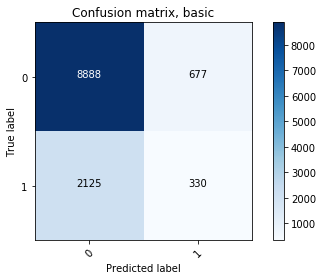

Confusion matrix, without normalization


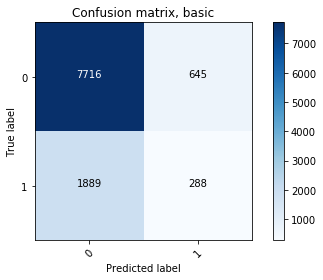

Confusion matrix, without normalization


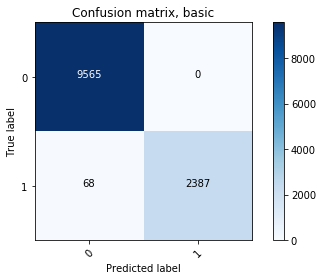

Confusion matrix, without normalization


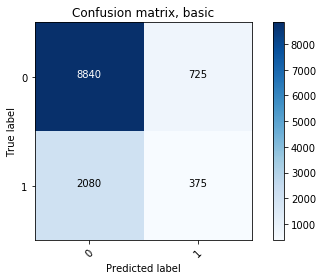

Confusion matrix, without normalization


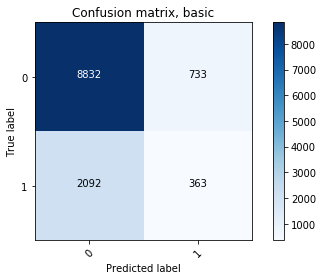

In [159]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm_basic = confusion_matrix(y_test, y_pred_basic)
cm_outliers = confusion_matrix(y_test_outliers, y_pred_outliers)
cm_PCA = confusion_matrix(y_test, y_pred_PCA)
cm_FT = confusion_matrix(y_test, y_pred_FT)
cm_poly = confusion_matrix(y_test, y_pred_poly)


np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_basic, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_outliers, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_PCA, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_FT, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()
plt.figure()
plot_confusion_matrix(cm_poly, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

## Hyper-Parameter tuning on the best results

In [178]:
#imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [179]:
# param values
neighbors = range(1, 32, 2)
weight = ["uniform", "distance"]
pp = [1, 2]
algo = ["auto"]
metric = ["minkowski", "manhattan"]
# creating  grid instance
grid_params_nn = dict(n_neighbors=neighbors, weights=weight, p=pp, algorithm=algo, metric=metric)

In [180]:
# load data
# get data
X, y = functions.get_data(type="__PCA")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [181]:
# creating KNN instance
knn = KNeighborsClassifier()
knnCV = GridSearchCV(knn, grid_params_nn, cv=10, scoring='f1', verbose=10, n_jobs=-1)

knnCV.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 18

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'metric': ['minkowski', 'manhattan'], 'weights': ['uniform', 'distance'], 'p': [1, 2], 'algorithm': ['auto'], 'n_neighbors': range(1, 32, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [183]:
# print results

best_score = knnCV.best_score_

best_params = knnCV.best_params_

print("Best score: {0}".format(best_score))
print("Best params: {0}".format(best_params))

f = open("../results/files/knn_tuning_results.txt", "w+")

f.write("Best score = {0} \n".format(best_score))
f.write("Best params = {0} \n".format(best_params))

f.close()

Best score: 0.985737291885481
Best params: {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'auto', 'p': 2}


## Run with best results again

In [186]:
# create KNN instance
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=1, weights='uniform', algorithm='auto', p=2)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [187]:
y_pred_PCA = knn.predict(X_test)

In [188]:
# calculate F1 score
f1_PCA = f1_score(y_test, y_pred_PCA)
"F1 score is = {0}".format(f1_PCA)

'F1 score is = 0.9872898728987289'

In [189]:
f = open("../results/files/knn_results_final.txt", "w+")
f.write("Basic KNN with PCA features: F1 score = {0} \n".format(f1_PCA))
f.close()

In [190]:
# write all data to CSV file for output
result = pd.DataFrame(y_pred_PCA, columns=["y_pred"])
result['y_test'] = y_test["Loan Status"].values
result.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
result = pd.concat([result, X_test], axis=1)
result.to_csv("../results/datasets/knn_prediction_final.csv")
result.head(20)

,y_pred,y_test,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,-0.394669,-0.028743,-0.257270,-0.289530,-0.758346,-0.208084,0.397865,-0.024111,...,-0.283244,0.153906,0.261108,0.130281,0.059156,-0.031446,-0.019454,-0.066093,0.051100,-0.000903
1,0.0,0.0,-0.397813,-0.057037,-0.172509,0.052432,1.406923,0.441850,0.195906,-0.153543,...,-0.153688,0.207358,-0.019073,-0.075415,-0.092979,-0.109952,0.050968,0.022644,0.024899,0.061057
2,0.0,0.0,-0.399265,-0.097745,-0.894736,0.375965,1.160763,-0.992941,0.327713,-0.282320,...,-0.280774,0.195533,-0.176645,-0.258875,-0.014457,-0.027887,-0.074415,-0.124431,-0.043032,0.000129
3,0.0,0.0,-0.394477,-0.021281,0.241131,0.657245,0.580866,-0.732392,0.778615,0.034851,...,-0.307974,0.096512,0.120761,-0.217813,0.008497,0.019301,-0.054198,-0.201127,-0.005035,0.069333
4,0.0,0.0,-0.384401,-0.007250,-0.273162,0.671431,0.703325,0.887603,-0.945880,-0.135938,...,-0.405564,-1.877944,-2.264691,-1.344004,-0.577811,-0.660793,-0.241396,-0.074608,-0.119823,0.119431
5,0.0,0.0,-0.392948,-0.093275,-0.806927,0.232582,-0.382666,-0.322584,-0.304176,-0.165201,...,-0.260915,0.147140,-0.336262,-0.266400,-0.052825,-0.022478,-0.075731,-0.015372,-0.043908,-0.014156
6,0.0,0.0,2.530990,-0.067730,0.259964,0.574834,-0.744059,-0.112967,-0.889443,-1.763298,...,-0.141879,0.084251,0.109525,0.071627,0.049238,-0.065990,-0.055590,0.057247,0.016916,-0.029343
7,0.0,0.0,-0.398427,-0.107544,-0.168499,0.694724,1.280692,-0.214541,-1.334775,-0.106168,...,-0.365236,-1.889421,-2.413846,-1.317003,-0.558068,-0.636538,-0.270063,-0.033699,-0.164098,0.023064
8,0.0,0.0,-0.396667,0.023979,2.279309,-0.302925,1.166196,0.469487,-0.198000,0.540528,...,-0.089484,-0.064671,0.068746,-0.062748,-0.126551,-0.031899,0.105481,0.069157,0.019873,0.096250
9,0.0,0.0,-0.390107,-0.030279,-0.651934,-0.254285,-0.693738,0.892747,0.801369,-0.158505,...,3.242996,0.133978,0.228708,0.040401,-0.052315,-0.057815,-0.021426,-0.057958,-0.089168,-0.030953


Confusion matrix, without normalization


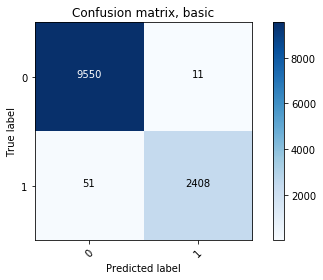

In [191]:
cm_final = confusion_matrix(y_test, y_pred_PCA)

np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_final, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()